In [1]:
## Import common packages

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
## 1.2

Xtrain = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
Ytrain = np.array(['Red', 'Red', 'Red', 'Green', 'Green', 'Red'])

xtest = np.array([0, 0, 0])

In [3]:
## 1.2 - distances

dists = []

for xtrain in Xtrain:
    dist = np.sqrt(np.sum(np.square(xtrain - xtest)))
    dists.append(dist)
    
    
dists = np.array(dists)
print(pd.DataFrame(dists, columns=['dist']).round(2))

   dist
0  3.00
1  2.00
2  3.16
3  2.24
4  1.41
5  1.73


In [4]:
## 1.2 - kNN

def knn(k):
    idx = np.argpartition(dists, k)
    ypred = Ytrain[idx[:k]]
    if 2 * np.count_nonzero(ypred[ypred == 'Red']) < len(ypred):
        return 'Green'
    else:
        return 'Red'
    
'k=1', knn(1), 'k=3', knn(3)

('k=1', 'Green', 'k=3', 'Red')

In [5]:
cm = np.array([[8, 2], [16, 974]])

acc = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[0, 0] / (cm[:, 0].sum())
recall = cm[0, 0] / cm[0, :].sum()

f'{acc=:.2f}', f'{precision=:.2f}', f'{recall=:.2f}'

('acc=0.98', 'precision=0.33', 'recall=0.80')

In [6]:
## 1.5

probs = np.array([0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1])
labels = np.array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [7]:
pred = np.where(probs > 0.5, 1, 0)

pos = labels == pred
neg = labels != pred
tp = np.count_nonzero(pred[pos] > 0)
tn = np.count_nonzero(pred[pos] == 0)
fp = np.count_nonzero(pred[neg] > 0)
fn = np.count_nonzero(pred[neg] == 0)

tp, tn, fp, fn

(4, 3, 1, 2)

In [8]:
# Returns TPR, FPR
def roc_point(threshold):
    pred = np.where(probs > threshold, 1, 0)
    
    pos = labels == pred
    neg = labels != pred
    
    tp = np.count_nonzero(pred[pos] > 0)
    tn = np.count_nonzero(pred[pos] == 0)
    fp = np.count_nonzero(pred[neg] > 0)
    fn = np.count_nonzero(pred[neg] == 0)
    
    return np.array([tp/(tp+fn), fp/(fp+tn)])

In [9]:
data = []

for threshold in probs:
    pt = roc_point(threshold)
    data.append(pt)

# Predict everyone as positive
data.append(roc_point(0))
data = np.array(data)

print(pd.DataFrame(data[:, ::-1], columns=['FPR', 'TPR']).round(2))

     FPR   TPR
0   0.00  0.00
1   0.00  0.17
2   0.00  0.33
3   0.25  0.33
4   0.25  0.50
5   0.25  0.67
6   0.50  0.67
7   0.50  0.83
8   0.50  1.00
9   0.75  1.00
10  1.00  1.00


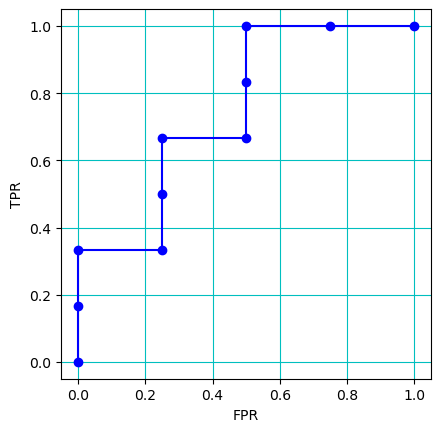

In [10]:
# Plot the ROC curve
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.xlim(lo, hi)
# plt.ylim(lo, hi)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(color='c', linestyle='-')

xs, ys = data[:, 1], data[:, 0]
plt.plot(xs, ys, '-o', color='b')

In [11]:
## 1.6

theta = np.array([0, 0, 0])
lr = 0.1
x = np.array([1, 3, 2])
y = 1


def sig(arg):
    return 1/(1 + math.e**-arg)

def loss():
    fx = sig(theta.T @ x)
    return -(y * np.log(fx) + (1 - y) * np.log(1 - fx))

f = sig(theta.T @ x)
grad = x * (f - y)

prev = loss()
theta = theta - lr * grad
after = loss()

f, grad, theta, prev, after

(0.5,
 array([-0.5, -1.5, -1. ]),
 array([0.05, 0.15, 0.1 ]),
 0.6931471805599453,
 0.40318604888545784)

In [12]:
## Problem 2.1

colnames = ['x1', 'x2', 'y']

df2z = pd.read_csv('../hw3Data/D2z.txt', sep=' ', names=colnames)
d2z = df2z.to_numpy()

In [13]:
xpos, xneg = [], []

for x1 in np.arange(-2, 2.1, 0.1):
    for x2 in np.arange(-2, 2.1, 0.1):
        pt = np.array([x1, x2])
        # Omit np.sqrt because it is monotonic
        closest = np.argmin(np.sum(np.square(pt - d2z[:, :2]), axis=1))
        if math.isclose(d2z[closest, 2], 1):
            xpos.append(pt)
        else:
            xneg.append(pt)
            
xpos, xneg = np.array(xpos), np.array(xneg)

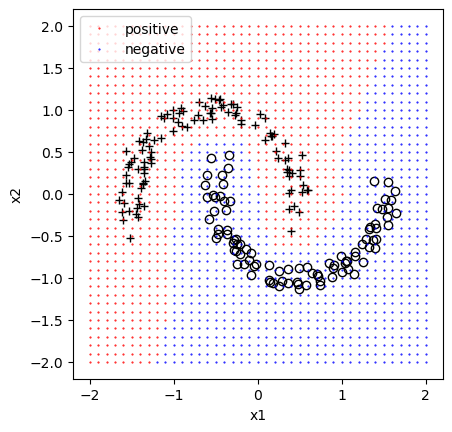

In [14]:
# Plot the result
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.xlim(lo, hi)
# plt.ylim(lo, hi)
plt.xlabel('x1')
plt.ylabel('x2')
# plt.grid(color='c', linestyle='-')
# Separate points into positive and negative labels
pos, neg = d2z[:, 2] == 1, d2z[:, 2] == 0
x1s, x2s = d2z[:, 0], d2z[:, 1]

# Plot the training points
plt.plot(x1s[pos], x2s[pos], 'k+')
plt.plot(x1s[neg], x2s[neg], 'ko', markerfacecolor='none')

# Plot the predictions
plt.plot(xpos[:, 0], xpos[:, 1], 'r.', markersize=1, alpha=1, label='positive')
plt.plot(xneg[:, 0], xneg[:, 1], 'b.', markersize=1, alpha=1, label='negative')

plt.legend()

In [15]:
## Problem 2.2

dfemails = pd.read_csv('../hw3Data/emails.csv')
demails = dfemails.to_numpy()

X = demails[:, 1:-1].astype(float)
Y = demails[:, -1].astype(int)

n, p = X.shape

In [16]:
## Compute pairwise distance for efficiency
## (idx1, idx2) - distance between these two points

dists = np.zeros((n, n))

for idx, x in enumerate(X):
    dists[idx, :] = np.sum(np.square(x - X), axis=1)

In [17]:
## Testing dists

np.sum(np.square(X[0] - X), axis=1)[1], np.sum(np.square(X[0] - X[1])), dists[0, 1]

(110984.0, 110984.0, 110984.0)

In [18]:
dupdists = np.concatenate((dists, dists), axis=1)
foldlen = n // 5

dupdists.shape, foldlen

((5000, 10000), 1000)

In [19]:
#np.argpartition(dupdists[:1, 5:6], 1, axis=1)
kclosest = np.argpartition(dupdists[:1, 5:7], 1, axis=1)[:, :1]

kclosest = (kclosest + 5)
close_labels = np.array([Y[kcl] for kcl in kclosest])
ypred = 2 * close_labels.sum(axis=1) >= 1
ytest = Y[:1]

kclosest, close_labels, ypred, ytest, ypred == ytest

(array([[6]]), array([[0]]), array([False]), array([0]), array([ True]))

In [20]:
kclosest = np.argpartition(dupdists[:1000, 1000:], 1, axis=1)[:, :1]

kclosest = (kclosest + 1000) % 5000
close_labels = np.array([Y[kcl] for kcl in kclosest])
ypred = 2 * close_labels.sum(axis=1) > 1
ytest = Y[:1000]

(ypred == ytest).sum()

1000

In [21]:
def run_knn(fold, k):
    # Test partition: [fold * 1000, (fold+1) * 1000)
    # Train partition: reamining
    # Use dupdists since it wrap duplicates the distances
    kclosest = np.argpartition(
        dupdists[fold * foldlen : (fold+1) * foldlen, (fold+1) * foldlen : (fold+5) * foldlen], k, axis=1)[:, :k]
    # argpartition returns index from the passed array
    # Need to offset this with the training data offset
    kclosest = (kclosest + (fold+1) * foldlen) % n
    close_labels = np.array([Y[kcl] for kcl in kclosest])
    ypred = 2 * close_labels.sum(axis=1) > k
    ytest = Y[fold * foldlen : (fold+1) * foldlen]
    
    match = ypred == ytest
    nomatch = ypred != ytest
    
    tp = np.count_nonzero(ypred[match] > 0)
    tn = np.count_nonzero(ypred[match] == 0)
    fp = np.count_nonzero(ypred[nomatch] > 0)
    fn = np.count_nonzero(ypred[nomatch] == 0)
    print(tp, tn, fp, fn)
    
    accuracy = np.count_nonzero(match) / len(match)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    print(f'{fold=}, {accuracy=:.2f}, {precision=:.2f}, {recall=:.2f}')
    
    return accuracy
    

In [22]:
def run_cv(k):
    accs = []
    for fold in range(0, 5):
        acc = run_knn(fold, k)
        accs.append(acc)
    accs = np.array(accs)
    return np.mean(accs)

#### Results for 1NN

233 592 123 52
accuracy=0.82, precision=0.65, recall=0.82

240 613 110 37
accuracy=0.85, precision=0.69, recall=0.87

238 625 91 46
accuracy=0.86, precision=0.72, recall=0.84

241 611 95 53
accuracy=0.85, precision=0.72, recall=0.82

232 543 151 74
accuracy=0.78, precision=0.61, recall=0.76


#### Results for Naive prediction

0 715 0 285
accuracy=0.71, precision=0.33, recall=0.80

0 723 0 277
accuracy=0.72, precision=0.33, recall=0.80

0 716 0 284
accuracy=0.72, precision=0.33, recall=0.80

0 706 0 294
accuracy=0.71, precision=0.33, recall=0.80

0 694 0 306
accuracy=0.69, precision=0.33, recall=0.80

In [23]:
ks = np.array([1, 3, 5, 7, 10])
accs = []
for k in ks:
    acc = run_cv(k)
    accs.append(acc)
    print(f'Accuracy for kNN, {k=}, {acc=}')
    
accs = np.array(accs)

233 592 123 52
fold=0, accuracy=0.82, precision=0.65, recall=0.82
240 613 110 37
fold=1, accuracy=0.85, precision=0.69, recall=0.87
238 625 91 46
fold=2, accuracy=0.86, precision=0.72, recall=0.84
241 611 95 53
fold=3, accuracy=0.85, precision=0.72, recall=0.82
232 543 151 74
fold=4, accuracy=0.78, precision=0.61, recall=0.76
Accuracy for kNN, k=1, acc=0.8336
248 597 118 37
fold=0, accuracy=0.84, precision=0.68, recall=0.87
226 625 98 51
fold=1, accuracy=0.85, precision=0.70, recall=0.82
231 627 89 53
fold=2, accuracy=0.86, precision=0.72, recall=0.81
243 636 70 51
fold=3, accuracy=0.88, precision=0.78, recall=0.83
225 550 144 81
fold=4, accuracy=0.78, precision=0.61, recall=0.74
Accuracy for kNN, k=3, acc=0.8416
242 595 120 43
fold=0, accuracy=0.84, precision=0.67, recall=0.85
217 633 90 60
fold=1, accuracy=0.85, precision=0.71, recall=0.78
233 638 78 51
fold=2, accuracy=0.87, precision=0.75, recall=0.82
237 633 73 57
fold=3, accuracy=0.87, precision=0.76, recall=0.81
229 550 144 77
f

(array([ 1,  3,  5,  7, 10]), array([0.8336, 0.8416, 0.8414, 0.846 , 0.8548]))

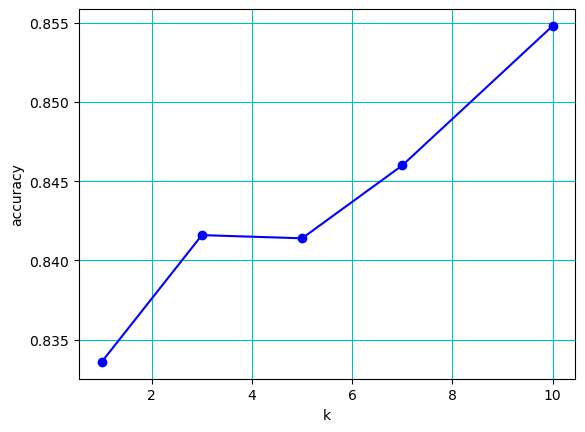

In [24]:
# Plot the result
ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
# plt.xlim(lo, hi)
# plt.ylim(0.83, 0.86)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(color='c', linestyle='-')

# Plot the training points
plt.plot(ks, accs, 'b-o')

ks, accs

In [25]:
## Problem 2.3

rng = np.random.default_rng(7)
w = rng.normal(size=p)
lr = 0.01

w.shape, lr

((3000,), 0.01)

In [26]:
## Exp does not behave well for large positive values
## Source: https://stackoverflow.com/a/29863846

def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

In [27]:
for idx in np.arange(3000):
    f = sigmoid(X[1000:] @ w)
    grad = X[1000:].T @ (f - Y[1000:])
    w = w - lr * grad
    
    if idx % 300 == 0:
        train_loss = np.mean((f - Y[1000:]) ** 2)
        f = sigmoid(X[:1000] @ w)
        val_loss = np.mean((f - Y[:1000]) ** 2)
        print(train_loss, val_loss)

f.shape, grad.shape

0.37065664329422005 0.715
0.23875000003976488 0.3919999999998597
0.2035 0.255
0.11973829281009077 0.096
0.15952454648975622 0.167
0.0865 0.085
0.08625 0.078
0.06824999999998921 0.077
0.06399999999846517 0.074
0.05500000004837171 0.073


((4000,), (3000,))

In [28]:
Xdup = np.concatenate((X, X), axis=0)
Ydup = np.concatenate((Y, Y))

Xdup.shape, Ydup.shape

((10000, 3000), (10000,))

In [29]:
def run_fold(fold):
    # Initialize weights
    rng = np.random.default_rng(7)
    w = rng.normal(size=p)
    lr = 0.005
    
    # Determine training and test sets for this fold
    Xtest = X[fold * foldlen : (fold+1) * foldlen]
    Xtrain = Xdup[(fold+1) * foldlen : (fold+5) * foldlen]
    Ytest = Y[fold * foldlen : (fold+1) * foldlen]
    Ytrain = Ydup[(fold+1) * foldlen : (fold+5) * foldlen]
    
    # Run the gradient descent optimization
    for idx in range(5000):
        f = sigmoid(Xtrain @ w)
        grad = Xtrain.T @ (f - Ytrain)
        w = w - lr * grad

        if (idx+1) % 500 == 0:
            train_loss = np.mean((f - Ytrain) ** 2)
            ftest = sigmoid(Xtest @ w)
            val_loss = np.mean((ftest - Ytest) ** 2)
            print(f'Loss: {train_loss=:.2f}, {val_loss=:.2f}')
            
    # Compute predicted labels with 0.5 threshold
    threshold = 0.5
    Ypred = sigmoid(Xtest @ w) > threshold
    
    # Compute confusion matrix
    match = Ypred == Ytest
    nomatch = Ypred != Ytest
    
    tp = np.count_nonzero(Ypred[match] > 0)
    tn = np.count_nonzero(Ypred[match] == 0)
    fp = np.count_nonzero(Ypred[nomatch] > 0)
    fn = np.count_nonzero(Ypred[nomatch] == 0)
    print(f'Confusion matrix: {tp=}, {tn=}, {fp=}, {fn=}')
    
    # Compute accuracy, precision, recall
    accuracy = np.count_nonzero(match) / len(match)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    print(f'Evaluation Metrics: {fold=}, {accuracy=:.2f}, {precision=:.2f}, {recall=:.2f}')

In [30]:
for fold in range(5):
    run_fold(fold)

Loss: train_loss=0.21, val_loss=0.34
Loss: train_loss=0.10, val_loss=0.09
Loss: train_loss=0.08, val_loss=0.08
Loss: train_loss=0.22, val_loss=0.30
Loss: train_loss=0.06, val_loss=0.08
Loss: train_loss=0.06, val_loss=0.07
Loss: train_loss=0.06, val_loss=0.07
Loss: train_loss=0.05, val_loss=0.07
Loss: train_loss=0.24, val_loss=0.39
Loss: train_loss=0.05, val_loss=0.06
Confusion matrix: tp=253, tn=687, fp=28, fn=32
Evaluation Metrics: fold=0, accuracy=0.94, precision=0.90, recall=0.89
Loss: train_loss=0.25, val_loss=0.32
Loss: train_loss=0.11, val_loss=0.12
Loss: train_loss=0.11, val_loss=0.08
Loss: train_loss=0.08, val_loss=0.08
Loss: train_loss=0.06, val_loss=0.07
Loss: train_loss=0.06, val_loss=0.07
Loss: train_loss=0.06, val_loss=0.07
Loss: train_loss=0.05, val_loss=0.06
Loss: train_loss=0.05, val_loss=0.06
Loss: train_loss=0.05, val_loss=0.06
Confusion matrix: tp=237, tn=699, fp=24, fn=40
Evaluation Metrics: fold=1, accuracy=0.94, precision=0.91, recall=0.86
Loss: train_loss=0.14, v

In [37]:
def knn_score(fold, k):
    # Test partition: [fold * 1000, (fold+1) * 1000)
    # Train partition: reamining
    # Use dupdists since it wrap duplicates the distances
    kclosest = np.argpartition(
        dupdists[fold * foldlen : (fold+1) * foldlen, (fold+1) * foldlen : (fold+5) * foldlen], k, axis=1)[:, :k]
    # argpartition returns index from the passed array
    # Need to offset this with the training data offset
    kclosest = (kclosest + (fold+1) * foldlen) % n
    close_labels = np.array([Y[kcl] for kcl in kclosest])
    yscore = close_labels.sum(axis=1) / k
    ytrue = Y[fold * foldlen : (fold+1) * foldlen]
    
    return ytrue, yscore

In [38]:
knn_ytrue, knn_yscore = knn_score(4, 5)

knn_ytrue.shape, knn_yscore.shape

((1000,), (1000,))

In [39]:
def logistic_score(fold):
    # Initialize weights
    rng = np.random.default_rng(7)
    w = rng.normal(size=p)
    lr = 0.005
    
    # Determine training and test sets for this fold
    Xtest = X[fold * foldlen : (fold+1) * foldlen]
    Xtrain = Xdup[(fold+1) * foldlen : (fold+5) * foldlen]
    Ytest = Y[fold * foldlen : (fold+1) * foldlen]
    Ytrain = Ydup[(fold+1) * foldlen : (fold+5) * foldlen]
    
    # Run the gradient descent optimization
    for idx in range(5000):
        f = sigmoid(Xtrain @ w)
        grad = Xtrain.T @ (f - Ytrain)
        w = w - lr * grad

        if (idx+1) % 500 == 0:
            train_loss = np.mean((f - Ytrain) ** 2)
            ftest = sigmoid(Xtest @ w)
            val_loss = np.mean((ftest - Ytest) ** 2)
            print(f'Loss: {train_loss=:.2f}, {val_loss=:.2f}')
            
    # Compute predicted labels with 0.5 threshold
    Yscore = sigmoid(Xtest @ w)
    
    return Ytest, Yscore

In [40]:
log_ytrue, log_yscore = logistic_score(4)

log_ytrue.shape, log_yscore.shape

Loss: train_loss=0.12, val_loss=0.19
Loss: train_loss=0.09, val_loss=0.15
Loss: train_loss=0.08, val_loss=0.12
Loss: train_loss=0.07, val_loss=0.13
Loss: train_loss=0.09, val_loss=0.19
Loss: train_loss=0.05, val_loss=0.09
Loss: train_loss=0.06, val_loss=0.09
Loss: train_loss=0.05, val_loss=0.10
Loss: train_loss=0.04, val_loss=0.09
Loss: train_loss=0.04, val_loss=0.09


((1000,), (1000,))

In [41]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, _ = roc_curve(knn_ytrue, knn_yscore)
log_fpr, log_tpr, _ = roc_curve(log_ytrue, log_yscore)

knn_area = auc(knn_fpr, knn_tpr)
log_area = auc(log_fpr, log_tpr)

knn_area, log_area, knn_fpr.shape, log_fpr.shape

(0.846393456518054, 0.8963312990902413, (7,), (7,))

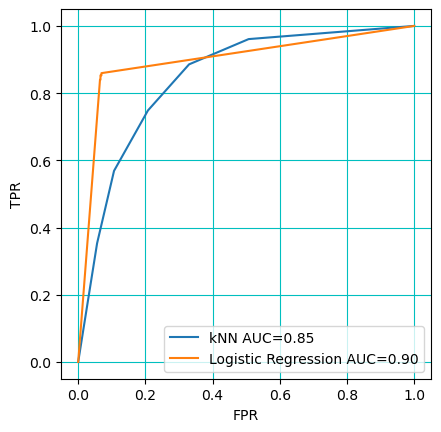

In [43]:
# Plot the result
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.xlim(lo, hi)
# plt.ylim(0.83, 0.86)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(color='c', linestyle='-')

# Plot the training points
plt.plot(knn_fpr, knn_tpr, 'tab:blue', label=f'kNN AUC={knn_area:.2f}')
plt.plot(log_fpr, log_tpr, 'tab:orange', label=f'Logistic Regression AUC={log_area:.2f}')

plt.legend()